In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats

sc.settings.verbosity = 3

In [2]:
data = pd.read_table("../../../Downloads/GSE72056_melanoma_single_cell_revised_v2.txt.gz", header=0)
def dedup(x):
    d = {}
    r = []
    for i in x:
        if i in d:
            d[i] += 1
            r.append(i + '_' + str(d[i]))
            print(i, 'renamed to', r[-1])
        else:
            d[i] = 1
            r.append(i)
    return r

data['Cell'] = dedup(data['Cell'])

data = data.T
data

MARCH2 renamed to MARCH2_2
MARCH1 renamed to MARCH1_2


,0,1,2,3,4,5,6,7,8,9,...,23679,23680,23681,23682,23683,23684,23685,23686,23687,23688
Cell,tumor,"malignant(1=no,2=yes,0=unresolved)","non-malignant cell type (1=T,2=B,3=Macro.4=End...",C9orf152,RPS11,ELMO2,CREB3L1,PNMA1,MMP2,TMEM216,...,GPLD1,SNORD115-39,RAB8A,RXFP2,PCIF1,PIK3IP1,SNRPD2,SLC39A6,CTSC,AQP7
Cy72_CD45_H02_S758_comb,72.0,1.0,2.0,0.0,9.2172,0.0,0.0,0.0,0.0,0.0,...,0.62667,0.0,0.0,0.0,0.0,7.6069,0.0,0.0,2.6638,0.0
CY58_1_CD45_B02_S974_comb,58.0,1.0,1.0,0.0,8.3745,0.0,0.0,0.0,0.0,0.0,...,1.0545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.9901,0.0
Cy71_CD45_D08_S524_comb,71.0,2.0,0.0,0.0,9.313,2.1263,0.0,0.0,0.73812,0.0,...,0.99639,0.0,2.7634,0.0,3.6782,0.0,3.9871,3.8777,1.6126,0.0
Cy81_FNA_CD45_B01_S301_comb,81.0,2.0,0.0,0.0,7.8876,0.0,0.0,0.0,0.0,0.0,...,0.23143,0.0,4.1937,0.0,0.0,0.0,5.2639,3.766,4.8417,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_7__S223_comb,75.0,1.0,1.0,0.0,5.4889,0.0,0.0,0.0,0.0,0.0,...,1.2962,0.0,0.0,0.0,0.0,0.0,6.0986,0.0,3.6464,0.0
CY75_1_CD45_CD8_1__S65_comb,75.0,1.0,1.0,0.0,4.9262,5.5296,0.0,0.0,0.0,0.0,...,0.99245,0.0,0.0,0.0,5.5465,3.7384,0.0,0.0,7.0004,0.0
CY75_1_CD45_CD8_1__S93_comb,75.0,1.0,1.0,0.0,7.0958,0.0,0.0,0.0,0.0,0.0,...,0.97516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9615,0.0
CY75_1_CD45_CD8_1__S76_comb,75.0,1.0,1.0,0.0,3.997,0.0,0.0,0.0,0.0,0.0,...,0.49208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.1918,0.0


In [3]:
data.columns = data.loc["Cell"]
data.drop('Cell', inplace=True)
data

Cell,tumor,"malignant(1=no,2=yes,0=unresolved)","non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)",C9orf152,RPS11,ELMO2,CREB3L1,PNMA1,MMP2,TMEM216,...,GPLD1,SNORD115-39,RAB8A,RXFP2,PCIF1,PIK3IP1,SNRPD2,SLC39A6,CTSC,AQP7
Cy72_CD45_H02_S758_comb,72.0,1.0,2.0,0.0,9.2172,0.0,0.0,0.0,0.0,0.0,...,0.62667,0.0,0.0,0.0,0.0,7.6069,0.0,0.0,2.6638,0.0
CY58_1_CD45_B02_S974_comb,58.0,1.0,1.0,0.0,8.3745,0.0,0.0,0.0,0.0,0.0,...,1.0545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.9901,0.0
Cy71_CD45_D08_S524_comb,71.0,2.0,0.0,0.0,9.313,2.1263,0.0,0.0,0.73812,0.0,...,0.99639,0.0,2.7634,0.0,3.6782,0.0,3.9871,3.8777,1.6126,0.0
Cy81_FNA_CD45_B01_S301_comb,81.0,2.0,0.0,0.0,7.8876,0.0,0.0,0.0,0.0,0.0,...,0.23143,0.0,4.1937,0.0,0.0,0.0,5.2639,3.766,4.8417,0.0
Cy80_II_CD45_B07_S883_comb,80.0,2.0,0.0,0.0,8.3291,0.0,0.0,0.0,0.0,3.7949,...,0.0,0.0,2.5705,0.0,0.0,0.0,6.0824,1.7816,4.4607,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_7__S223_comb,75.0,1.0,1.0,0.0,5.4889,0.0,0.0,0.0,0.0,0.0,...,1.2962,0.0,0.0,0.0,0.0,0.0,6.0986,0.0,3.6464,0.0
CY75_1_CD45_CD8_1__S65_comb,75.0,1.0,1.0,0.0,4.9262,5.5296,0.0,0.0,0.0,0.0,...,0.99245,0.0,0.0,0.0,5.5465,3.7384,0.0,0.0,7.0004,0.0
CY75_1_CD45_CD8_1__S93_comb,75.0,1.0,1.0,0.0,7.0958,0.0,0.0,0.0,0.0,0.0,...,0.97516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9615,0.0
CY75_1_CD45_CD8_1__S76_comb,75.0,1.0,1.0,0.0,3.997,0.0,0.0,0.0,0.0,0.0,...,0.49208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.1918,0.0


In [4]:

obs = data[['tumor', 'malignant(1=no,2=yes,0=unresolved)', 'non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)']]
obs['patient'] = data.index.str.split('-|_', regex=True).str[0].str[:4].str.lower()
data.drop(['tumor', 'malignant(1=no,2=yes,0=unresolved)', 'non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)'], 
          axis=1, inplace=True)
print(data.columns[data.columns.str.startswith('ERCC')], 'dropped')
data = data.loc[:, data.columns.str.startswith('ERCC') == False]

/tmp/ipykernel_4021904/3578798519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['patient'] = data.index.str.split('-|_', regex=True).str[0].str[:4].str.lower()


Index(['ERCC5', 'ERCC8', 'ERCC1', 'ERCC4', 'ERCC6L', 'ERCC6L2', 'ERCC3',
       'ERCC6', 'ERCC2'],
      dtype='object', name='Cell') dropped


In [5]:
pd.crosstab(obs['malignant(1=no,2=yes,0=unresolved)'], obs['non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)'])

"non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)",0.0,1.0,2.0,3.0,4.0,5.0,6.0
"malignant(1=no,2=yes,0=unresolved)",,,,,,,
0.0,90,24,3,6,3,5,1
1.0,416,2040,512,119,62,56,51
2.0,1252,4,0,1,0,0,0


In [6]:
malignant_dict = ['unresolved', 'normal', 'tumor']
celltype_dict = ['NA', 'T', 'B', 'Macro', 'Endo', 'CAF', 'NK']
obs['malignant'] = obs['malignant(1=no,2=yes,0=unresolved)'].astype(int).apply(malignant_dict.__getitem__)
obs['celltype'] = obs['non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)'].astype(int).apply(celltype_dict.__getitem__)

/tmp/ipykernel_4021904/1912649440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['malignant'] = obs['malignant(1=no,2=yes,0=unresolved)'].astype(int).apply(malignant_dict.__getitem__)
/tmp/ipykernel_4021904/1912649440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['celltype'] = obs['non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)'].astype(int).apply(celltype_dict.__getitem__)


In [7]:
adata = sc.AnnData(data)
for i in obs.columns:
    adata.obs[i] = obs[i]
    
del data
adata

/tmp/ipykernel_4021904/2711207611.py:1: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(data)


AnnData object with n_obs × n_vars = 4645 × 23677
    obs: 'tumor', 'malignant(1=no,2=yes,0=unresolved)', 'non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)', 'patient', 'malignant', 'celltype'

normalizing counts per cell
    finished (0:00:00)


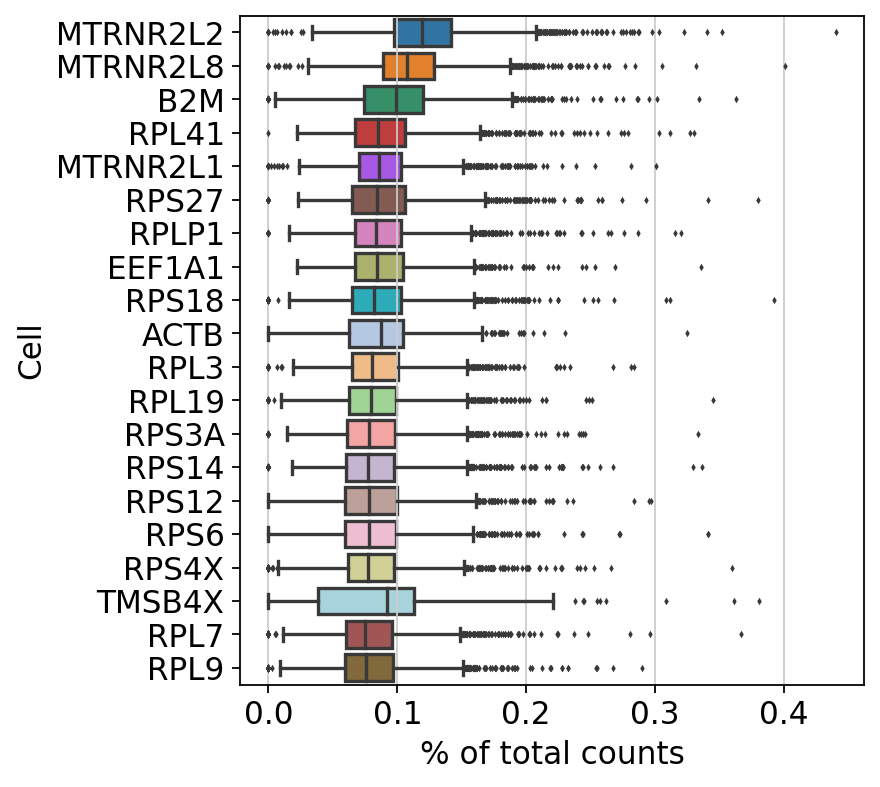

In [8]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pl.highest_expr_genes(adata, n_top=20)

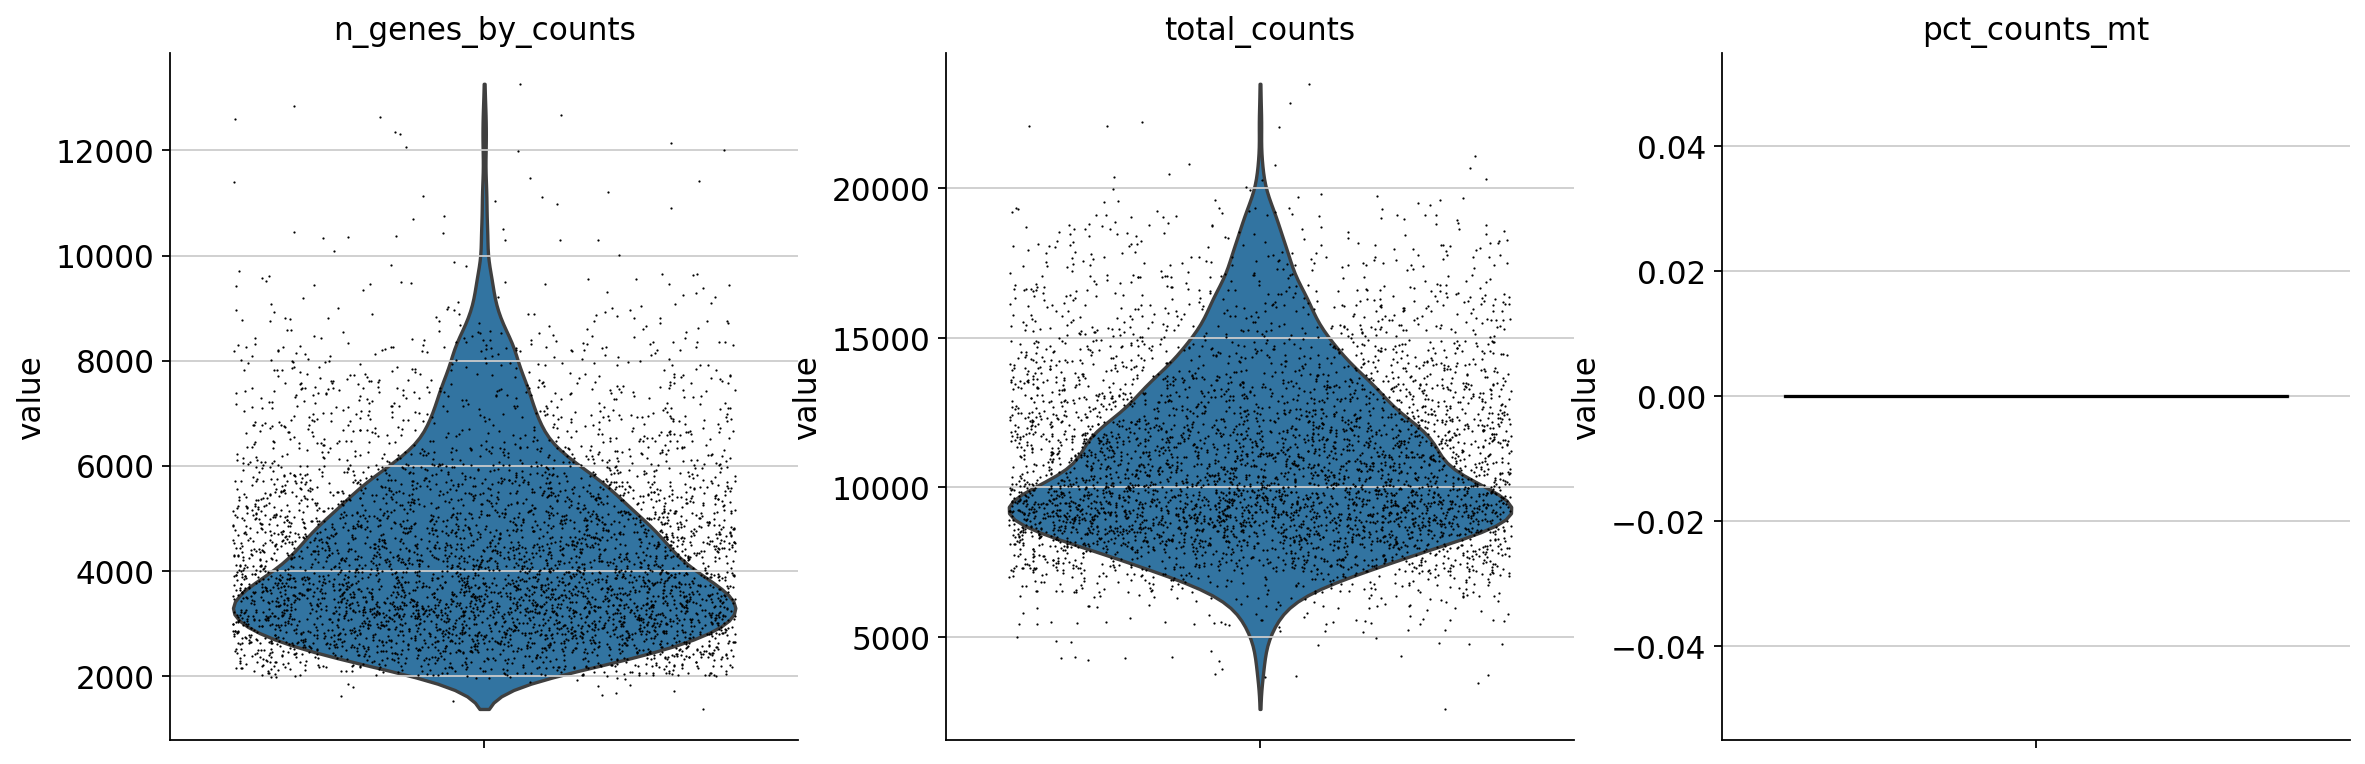

In [9]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

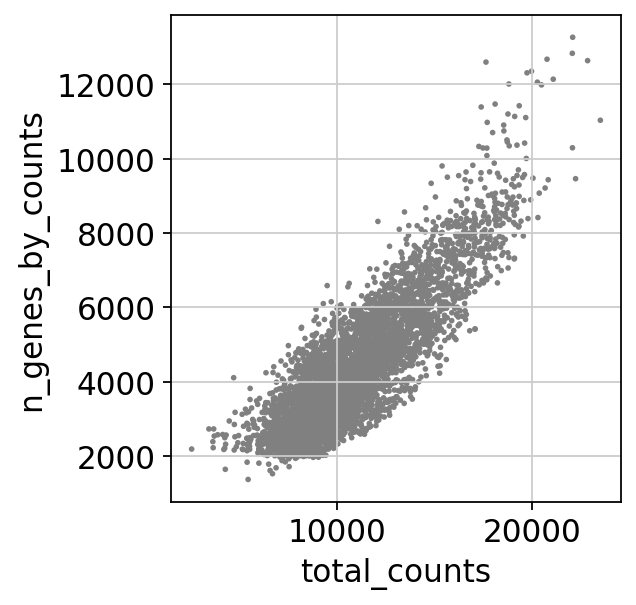

In [10]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [11]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 1397 genes that are detected in less than 3 cells


In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


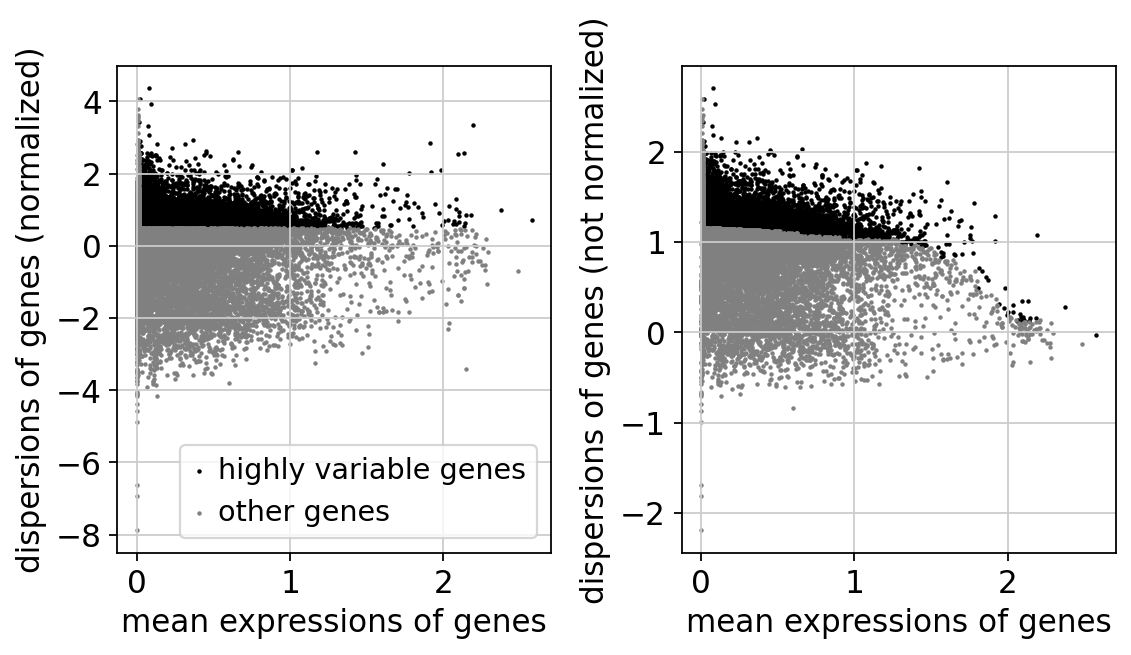

In [13]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [14]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

In [15]:
sc.pp.scale(adata, max_value=10)
adata

/home/shaoheng/miniconda3/envs/torch/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 4645 × 6219
    obs: 'tumor', 'malignant(1=no,2=yes,0=unresolved)', 'non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)', 'patient', 'malignant', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [16]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


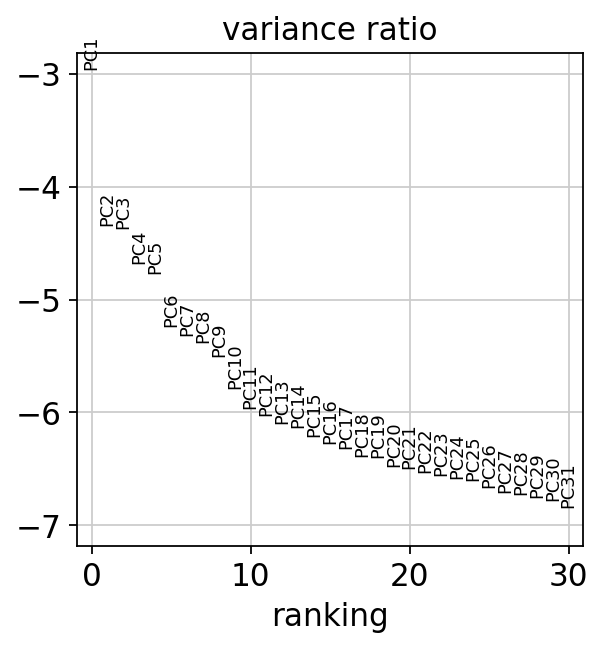

In [17]:
sc.pl.pca_variance_ratio(adata, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


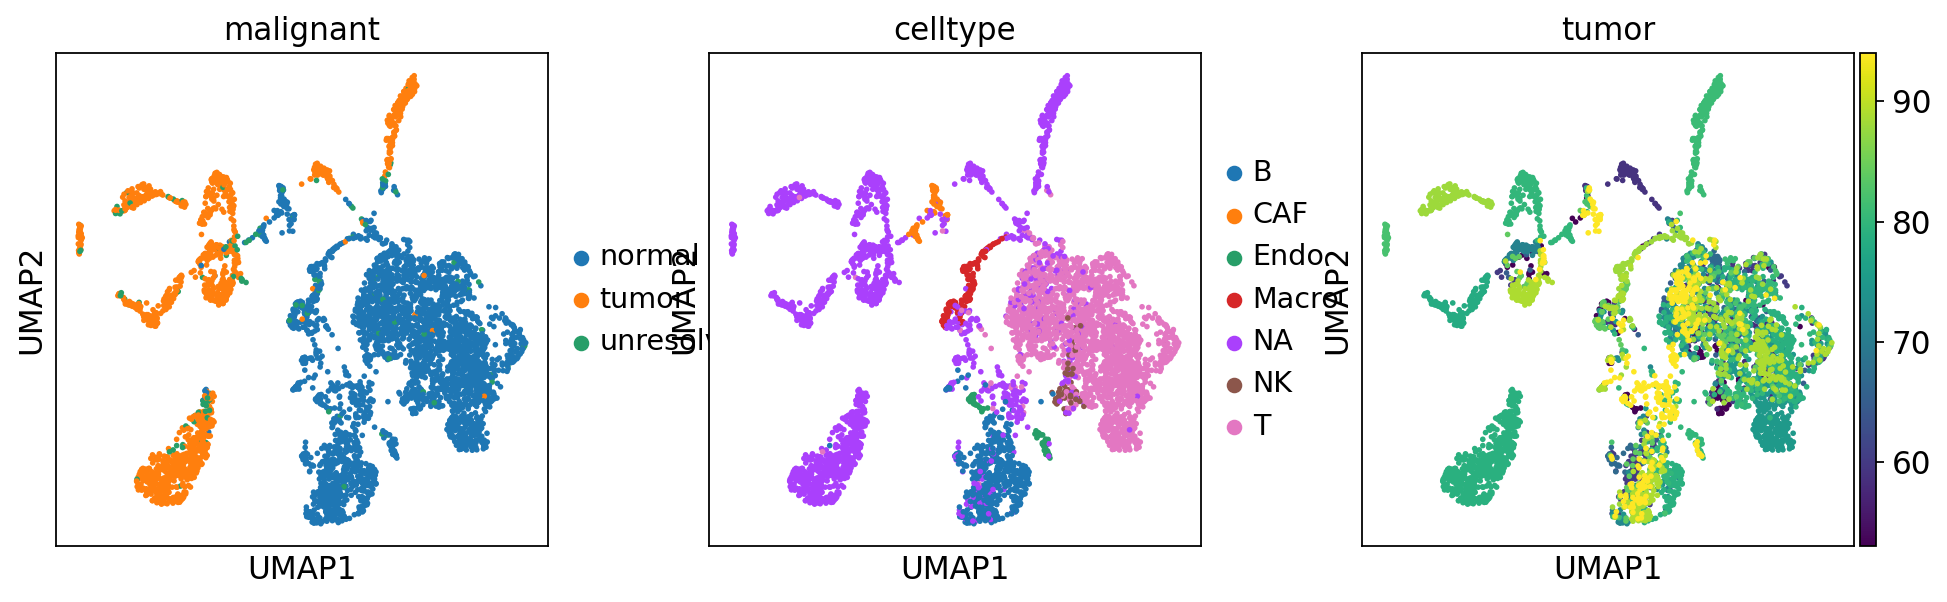

In [18]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['malignant', 'celltype', 'tumor'])

In [19]:
# import sys
# sys.path.insert(0,'..')
import scmer._umap_l1
model = scmer._umap_l1.UmapL1(lasso=5e-4, n_pcs=20, 
                              perplexity=30., use_beta_in_Q=True, n_threads=12, use_gpu=True) # , max_inner_iter=1, max_outer_iter=1
model.fit(adata.X, batches=adata.obs['patient'])


Batch cy53 with 143 instances.
Calculating distance matrix and scaling factors...
Computing pairwise distances...
Using 12 threads...
Mean value of sigma: 2.406144
Done. Elapsed time: 0.58 seconds. Total: 0.58 seconds.
Batch cy58 with 142 instances.
Calculating distance matrix and scaling factors...
Computing pairwise distances...
Using 12 threads...
Mean value of sigma: 1.691137
Done. Elapsed time: 0.57 seconds. Total: 1.15 seconds.
Batch cy59 with 70 instances.
Calculating distance matrix and scaling factors...
Computing pairwise distances...
Using 12 threads...
Mean value of sigma: 2.324187
Done. Elapsed time: 0.59 seconds. Total: 1.74 seconds.
Batch cy60 with 226 instances.
Calculating distance matrix and scaling factors...
Computing pairwise distances...
Using 12 threads...
Mean value of sigma: 1.837957
Done. Elapsed time: 0.62 seconds. Total: 2.36 seconds.
Batch cy65 with 63 instances.
Calculating distance matrix and scaling factors...
Computing pairwise distances...
Using 12 thr

In [20]:
adata.var_names[model.get_mask()]

Index(['CST7', 'HLA-DRA', 'TMSB4X', 'CD4', 'TFF2', 'CD79A', 'IL7R', 'ASF1B',
       'NKG7', 'KLRK1', 'MTRNR2L2', 'HLA-DRB1', 'HLA-DRB5', 'CD2', 'IL32',
       'CD3D', 'CD8A', 'HLA-DQA1', 'MS4A1', 'CCL4', 'CD3E', 'HLA-DPA1'],
      dtype='object', name='Cell')

In [27]:
adata.X

array([[ 1.4073725 , -0.55970967, -0.46404412, ..., -0.7445662 ,
        -0.64773685,  1.8001503 ],
       [ 0.67959446, -0.55970967, -0.46404412, ..., -0.7445662 ,
        -0.64773685, -0.8648009 ],
       [ 0.14933932,  1.116944  , -0.46404412, ...,  0.8519588 ,
         1.3821898 , -0.8648009 ],
       ...,
       [ 0.04034085, -0.55970967, -0.46404412, ..., -0.7445662 ,
        -0.64773685, -0.8648009 ],
       [-1.1266661 , -0.55970967, -0.46404412, ..., -0.7445662 ,
        -0.64773685, -0.8648009 ],
       [-1.5516781 , -0.55970967, -0.46404412, ..., -0.7445662 ,
         1.7677367 ,  1.1693536 ]], dtype=float32)

In [31]:
np.savetxt("melanoma.txt", adata.X, '%.3f')

In [36]:
adata.obs['patient'].to_csv("melanoma_batches.txt", index=False, header=None)

In [44]:
pd.Series(adata.var_names).to_csv("genes.txt", index=False, header=None)